In [176]:
# Loading Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [177]:
# Loading Data From Source.
def load_data():
  url = r'https://raw.githubusercontent.com/Python-Charmer/Final-Project-Team-Python-Charmer/master/Phase1/Data/BreastCancerWisconsin.csv'
  df = pd.read_csv(url)
  names = ['Scn','A2','A3','A4','A5','A6','A7', 'A8','A9','A10','Class']
  df.columns = names
  return df

In [178]:
# Understanding Missing Values
def clean_missing(df):
  df['A7'] = df['A7'].replace('?',np.NaN)
  df['A7'] = pd.to_numeric(df['A7'])
  print("Below are how many missing values for each column\n")
  print(df.isnull().sum())
  print("\nCleaning missing values with column means\n")
  df = df.fillna(round(df.mean(skipna = True),2))
  print(df.isnull().sum())
  return df

In [179]:
# Calculating Summary Metrics
def  sum_metrics(df):
  print("\n Below are the summary metrics of the data \n" + str(df.describe()))
  print ("\n\nThere are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " Columns in this data frame")
  print("\nThere are " + str(len(df['Scn'].unique())) + " unique scn values in the dataset.\n")
  print("Below are the duplicate rows in the dataset.\n")
  print(str(df.loc[df.duplicated(), :]) + "\n")

In [180]:
# Plotting graphs
def plot_graphs(df):
  print("\nBelow are the histograms of A2:A10 \n")
  df.iloc[:,1:10].hist(bins = 8, color="blue", grid="False",alpha = .5, figsize=(12,6))
  plt.tight_layout(rect=(0,0,1.2,1.2))
  plt.show()
  df['Class'].value_counts().plot.bar().set_title("Class Variable: 2 = Benign 4 = Malignant")
  df.plot.scatter(x='A3', y='A4').set_title("Scatter of A3 & A4 90% corr")

In [181]:
# We are getting centers for K = 4 clusters
def get_mids(X):
  clss = KMeans(n_clusters = 4) 
  clss.fit(X)
  cent = clss.cluster_centers_
  print("\n Below are the centers of K = 4 clusters \n")
  print(pd.DataFrame(cent ,columns  = X.columns))

In [182]:
# We are plotting intertia plot to find optimal K
def find_optimal_K(X):
  print("\n Below is the intertia chart \n")
  inertia = []
  k = []
  for i in range(1,15):
    clss = KMeans(n_clusters = i) 
    clss.fit(X)
    iner = clss.inertia_
    k.append(i)
    inertia.append(iner)
  res  = pd.concat([pd.DataFrame(k), pd.DataFrame(inertia)],axis = 1)
  res.columns = ['K','Inertia']
  ax = res.plot("K",marker='o', linestyle='dashed', title = "Optimal K = 2" )
  ax.set_xlabel("Number of Clusters")
  ax.set_ylabel("Inertia")

In [183]:
# Plotting SD plot to understand the data variance
def sd_plot(X):
  dt = pd.DataFrame(X.std()).sort_values(by = 0, ascending = False)
  dt.reset_index()
  fig, ay = plt.subplots()
  x_val = dt.index
  y_val = dt[0].values
  ay.bar(x = x_val, height = y_val)
  ay.set_xlabel("Features")
  ay.set_ylabel("Standard Deviation")
  ay.set_title("Standard Deviation Plot")


# Plotting Box plot to understand the data variance
def var_plot(df):
  # Box plot showing variation of the columns A2:A10
  data = []
  for i in range(1, 10):
      data.append(df.iloc[:, i])

  # Multiple box plots on one Axes
  fig, ax = plt.subplots()
  plt.title("Boxplot showing Variation of Features")
  plt.xlabel("Columns A2 thru A10")
  plt.ylabel("Values")
  ax.boxplot(data, 0,showbox=True,showmeans=True)
  top = 12
  bottom = -2
  ax.set_ylim(bottom, top)
  ax.set_xticklabels(df.iloc[:,1:-1].columns, rotation=45, fontsize=8)
  plt.show()

In [184]:
#Getting centers of optimal K  = 2
def get_centers(X):
  print("\n Below are the centers of K = 2 clusters \n \n")
  mdl = make_pipeline(StandardScaler(), KMeans(n_clusters = 2, n_init=20))
  mdl.fit(X)
  centers = pd.DataFrame(mdl.named_steps['kmeans'].cluster_centers_)
  centers.columns = X.columns
  print(centers)

In [185]:
# Cross tabulating the cluster labels with "Class"
def lables(i,df):
  print("\nBelow are the predicted labels with k = " + str(i) + "\n")
  if i == 4:
    mdl = KMeans(n_clusters = i)
  else:
    mdl =  make_pipeline(StandardScaler(), KMeans(n_clusters = i, n_init=20))
  labels = mdl.fit_predict(df.iloc[:,1:-1])
  ctf = pd.DataFrame({'labels': labels, 'Class': df["Class"]})
  print(pd.crosstab(ctf['labels'], ctf['Class']))

In [186]:
# Create a new DataFrame for Phase 3
def DataFrame_Phase3(X):
  scaler = StandardScaler()  
  model = KMeans(n_clusters = 2, n_init=20, max_iter=500)
  pipeline = make_pipeline(scaler,model)
  pipeline.fit(X)
  labels = pipeline.predict(X)  
  df['Predicted'] = labels  
  df['New_Data'] = df['Predicted']
  df['New_Data'] = df['New_Data'].replace(0, 2)
  df['New_Data'] = df['New_Data'].replace(1, 4) 
  print(df.head(n=15))

In [187]:
# Create function to calculate error rate
def Error_Rate(New_Data,Class):
# count how many 2 and 4 values in New_Data column
# df['New_Data'].value_counts()
# count how many labels (=2) that are in CLASS have value of 4
# labels_class = df.groupby('New_Data')['Class'].value_counts()
    err_p4_a2 = df[(df.Class == 2) & (df.New_Data == 4)]['Class'].count()
    err_p2_a4 = df[(df.Class == 4) & (df.New_Data == 2)]['Class'].count()
    err_tot_22 = df[(df.New_Data == 2)]['Class'].count()
    err_tot_44 = df[(df.New_Data == 4)]['Class'].count()

    B2  = str(round(err_p4_a2/err_tot_22,4)*100) + "%"
    M2 = str(round(err_p2_a4/err_tot_44,4)*100) + "%"
    tot_error2 = str(round((err_p4_a2 + err_p2_a4)/(err_tot_22 + err_tot_44),4)*100) + "%"
    
    print()  
    print("The error rate for beningn cells is " + str(B2) + "\n")
    print("The error rate for malignent cells is " +str(M2) + "\n")
    print("The total error rate is " +str(tot_error2) + "\n")


Below are how many missing values for each column

Scn       0
A2        0
A3        0
A4        0
A5        0
A6        0
A7       16
A8        0
A9        0
A10       0
Class     0
dtype: int64

Cleaning missing values with column means

Scn      0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
Class    0
dtype: int64

 Below are the summary metrics of the data 
                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.3454

C:\Users\jtm_u\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


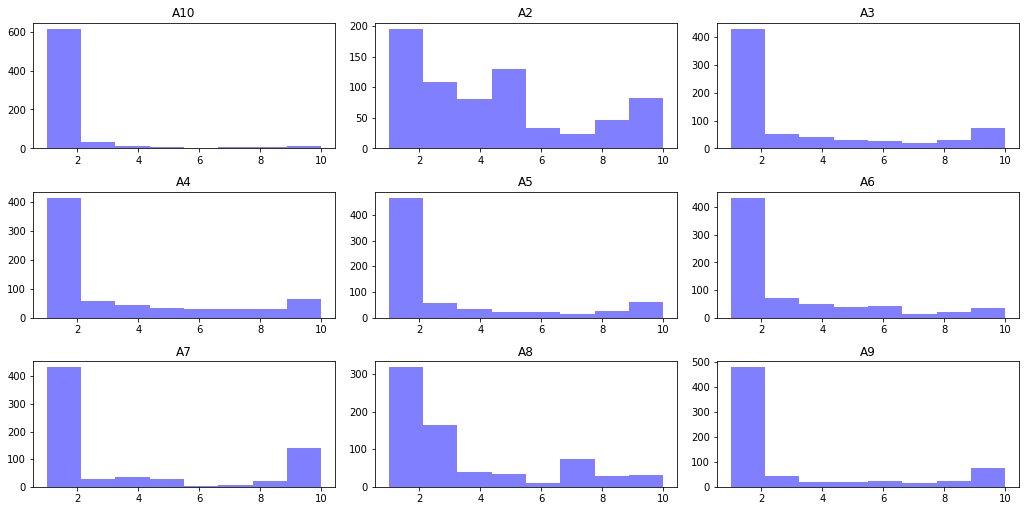

The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.


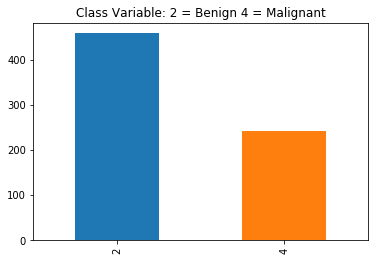

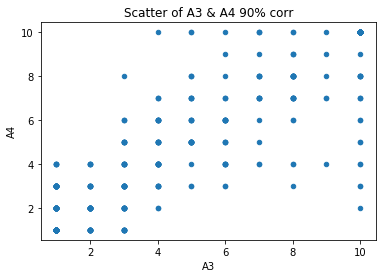

In [188]:
# Main Function Phase 1
df = load_data()
df = clean_missing(df)
sum_metrics(df)
plot_graphs(df)
print("The columns that need standardization are: A7,A3,& A9 because they have the highest amount of variance compared to other factors.")


 Below are the centers of K = 4 clusters 

         A2        A3        A4        A5        A6        A7        A8  \
0  2.971491  1.252193  1.372807  1.291667  2.048246  1.351930  2.072368   
1  7.421875  7.484375  7.015625  4.640625  5.906250  3.447188  5.546875   
2  6.721519  8.367089  8.405063  7.721519  6.734177  9.316456  7.367089   
3  7.270000  4.800000  5.030000  4.660000  4.040000  9.045400  5.210000   

         A9       A10  
0  1.210526  1.103070  
1  7.203125  2.281250  
2  7.734177  3.734177  
3  3.800000  1.670000  

Below are the predicted labels with k = 4

Class     2   4
labels         
0       444  10
1         7  87
2         7  64
3         0  80

 Below is the intertia chart 



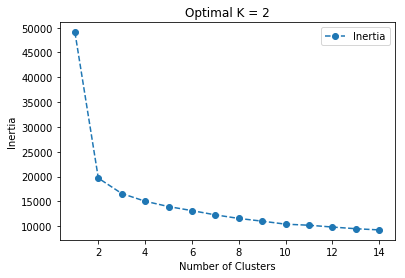

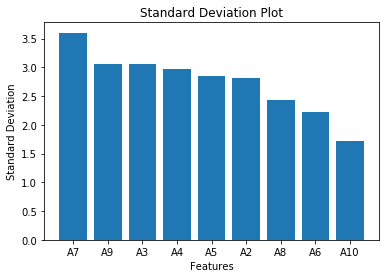

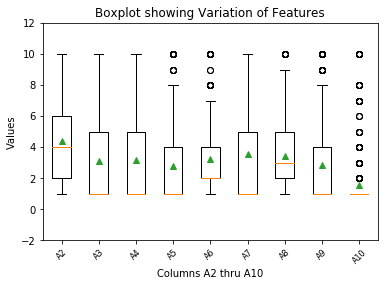


 Based on the Box and SD plot above we can see features A7,A9 has the most variations.


 Below are the centers of K = 2 clusters 
 

         A2        A3        A4        A5        A6        A7        A8  \
0  0.982768  1.200701  1.191076  1.019167  1.013936  1.156487  1.082987   
1 -0.497738 -0.608113 -0.603239 -0.516173 -0.513524 -0.585721 -0.548496   

         A9       A10  
0  1.047659  0.599590  
1 -0.530603 -0.303672  

Below are the predicted labels with k = 2

Class     2    4
labels          
0       446   18
1        12  223


In [189]:
#Main Functions Phase 2
X = df.drop(['Scn','Class'], axis  = 1)
y = df['Class']
get_mids(X)
lables(4,df)
find_optimal_K(X)
sd_plot(X)
var_plot(df)
print('\n Based on the Box and SD plot above we can see features A7,A9 has the most variations.\n')
get_centers(X)
lables(2,df)

In [190]:
#Main Function Phase 3
DataFrame_Phase3(X)
Error_Rate(df['New_Data'], df['Class'])

        Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  Class  Predicted  New_Data
0   1000025   5   1   1   1   2   1.0   3   1    1      2          0         2
1   1002945   5   4   4   5   7  10.0   3   2    1      2          1         4
2   1015425   3   1   1   1   2   2.0   3   1    1      2          0         2
3   1016277   6   8   8   1   3   4.0   3   7    1      2          1         4
4   1017023   4   1   1   3   2   1.0   3   1    1      2          0         2
5   1017122   8  10  10   8   7  10.0   9   7    1      4          1         4
6   1018099   1   1   1   1   2  10.0   3   1    1      2          0         2
7   1018561   2   1   2   1   2   1.0   3   1    1      2          0         2
8   1033078   2   1   1   1   2   1.0   1   1    5      2          0         2
9   1033078   4   2   1   1   2   1.0   2   1    1      2          0         2
10  1035283   1   1   1   1   1   1.0   3   1    1      2          0         2
11  1036172   2   1   1   1   2   1.0   2   1    1  